# Picture segmentation


In [5]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [47]:
image_path = r"C:\Users\Dosya\Desktop\фотки\ba57baeb21bcec06794b92c4ff56bea4.png"
image = Image.open(image_path).convert('RGB')
image_array = np.array(image)


In [48]:
print(f'Shape of the image: {image_array.shape}')

Shape of the image: (1200, 1195, 3)


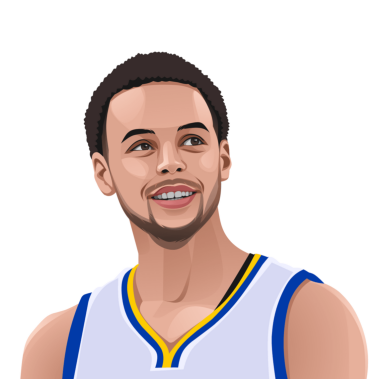

In [49]:
plt.imshow(image_array)
plt.axis('off')
plt.show()

In [50]:
R = image_array[:, :, 0]
G = image_array[:, :, 1]
B = image_array[:, :, 2]

print("R-канал:", R.shape)
print("G-канал:", G.shape)
print("B-канал:", B.shape)

R-канал: (1200, 1195)
G-канал: (1200, 1195)
B-канал: (1200, 1195)


In [81]:
n_components = 80
def applyPCA(x):
    
    pca = PCA(n_components = n_componenta)
    transformed = pca.fit_transform(x)

    return transformed, pca
    

In [74]:
R_pca, R_model = applyPCA(R)
G_pca, G_model = applyPCA(G)
B_pca, B_model = applyPCA(B)

print("R after PCA:", R_pca.shape)
print("G after PCA:", G_pca.shape)
print("B after PCA:", B_pca.shape)


R after PCA: (1200, 80)
G after PCA: (1200, 80)
B after PCA: (1200, 80)


In [75]:
RGB_combined = np.hstack([R_pca, G_pca, B_pca])

In [76]:
print(f'The shape of the new array: {RGB_combined}')

The shape of the new array: [[ 2.34804757e+02  9.05127611e+02  8.45000872e+02 ... -1.26027847e+00
  -1.10697562e+00 -1.34783346e+00]
 [ 2.34804757e+02  9.05127611e+02  8.45000872e+02 ... -1.26027847e+00
  -1.10697562e+00 -1.34783346e+00]
 [ 2.34804757e+02  9.05127611e+02  8.45000872e+02 ... -1.26027847e+00
  -1.10697562e+00 -1.34783346e+00]
 ...
 [-1.50981263e+03 -4.30219432e+01 -1.23741001e+01 ... -5.11223765e+01
   1.62774531e+01 -1.13744416e+01]
 [-1.50013768e+03 -4.00439002e+01 -1.03282586e+01 ... -5.21519200e+01
   1.58972872e+01 -1.17025990e+01]
 [-1.50298511e+03 -3.94131712e+01 -9.92538646e+00 ... -5.27667112e+01
   1.88149263e+01 -1.12245655e+01]]


In [77]:
n_clusters = 30
randoming = 312

from sklearn.cluster import KMeans
kme = KMeans(n_clusters = n_clusters, random_state = randoming)

clusters = kme.fit_predict(RGB_combined)
print(f'Examples of clusters: {clusters[:30]}')

centers = kme.cluster_centers_
print(f'The centers: {centers}')



Examples of clusters: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
The centers: [[ 6.67736037e+02  1.70870147e+02 -9.09186184e+02 ...  1.26978714e+01
  -1.10762450e+01  3.11761335e+00]
 [ 5.13667061e+02 -2.56352675e+00  4.17436719e+02 ... -4.84246470e+00
   3.59669385e+00  2.56753312e+00]
 [-1.67205221e+03 -6.09553909e+02 -3.53011793e+01 ...  3.57149626e+00
   8.24548206e-01 -1.66096968e+00]
 ...
 [ 6.95538691e+02  5.29433439e+02 -1.50193851e+03 ...  5.32638641e-01
  -2.80960323e+00  7.57063988e+00]
 [-1.33572090e+03  2.70243496e+02 -3.02617594e+02 ...  3.11063628e+00
  -4.80752645e+00  3.44905958e+00]
 [-6.15828024e+02  3.40366404e+01  6.91405664e+02 ...  1.11971416e+01
   8.19842891e+00  2.51229193e+00]]


In [78]:
RGB_clustered = centers[clusters]
R_clustered = RGB_clustered[:, :n_components]
G_clustered = RGB_clustered[:,n_components:2*n_components]
B_clustered = RGB_clustered[:, 2*n_components:]

In [79]:
R_restored = R_model.inverse_transform(R_clustered)
G_restored = G_model.inverse_transform(G_clustered)

B_restored = B_model.inverse_transform(B_clustered)

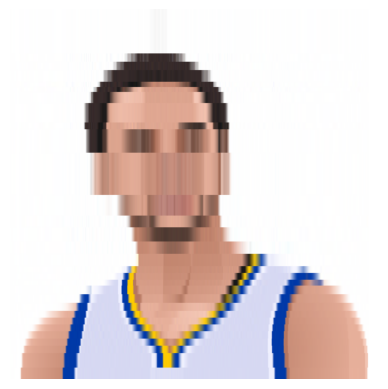

In [80]:
restored_image = np.stack([R_restored, G_restored, B_restored], axis = 2)
restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)
plt.imshow(restored_image)
plt.axis('off')
plt.show()
